In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import warnings 
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('Zoo.csv')

In [31]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
df.drop(columns='animal name',inplace=True)

In [34]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [36]:
x=df.iloc[:,:-1]
y=df['type']

In [37]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)


In [39]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [40]:
ypred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2],
      dtype=int64)

In [41]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.95, 0.9047619047619048)

In [42]:
train_accu=[]
test_accu=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_accu.append(knn.score(xtrain,ytrain))
    test_accu.append(knn.score(xtest,ytest))

In [44]:
train_accu

([1.0,
  0.95,
  0.95,
  0.9625,
  0.9625,
  0.95,
  0.925,
  0.925,
  0.9125,
  0.9125,
  0.9125,
  0.9,
  0.8875,
  0.8625,
  0.8625,
  0.875,
  0.875,
  0.8875,
  0.8875],
 [0.9523809523809523,
  0.8571428571428571,
  0.9047619047619048,
  0.9523809523809523,
  0.8571428571428571,
  0.9047619047619048,
  0.9047619047619048,
  0.9047619047619048,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571])

In [45]:
test_accu

[0.9523809523809523,
 0.8571428571428571,
 0.9047619047619048,
 0.9523809523809523,
 0.8571428571428571,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

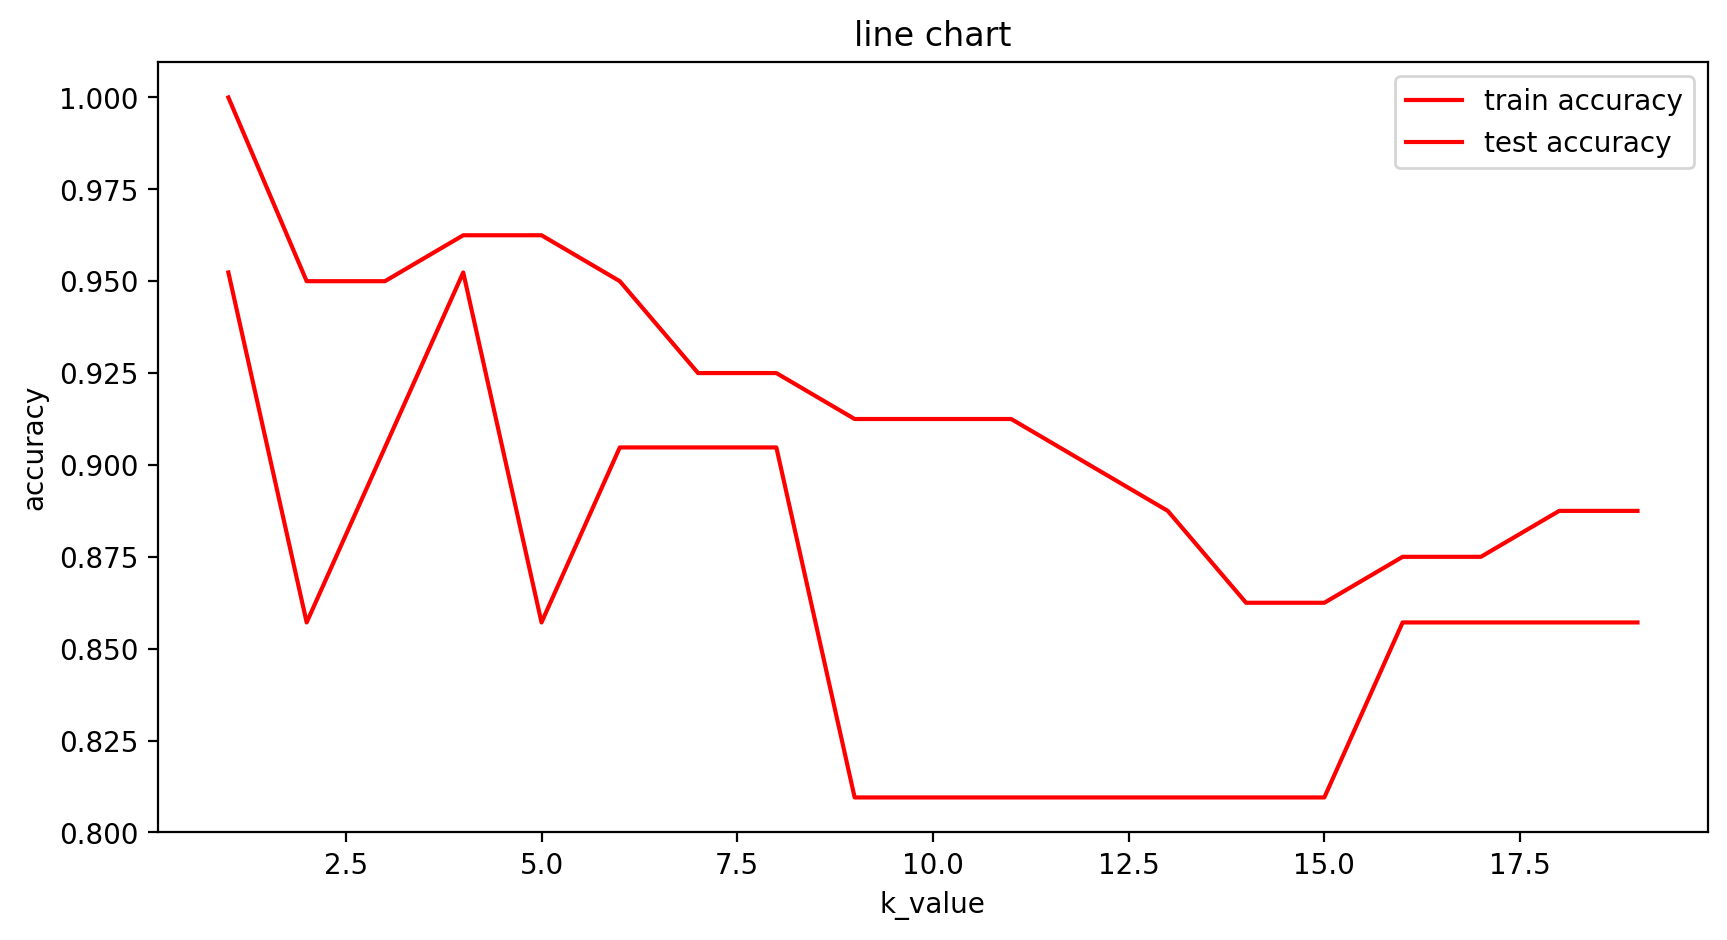

In [46]:
plt.plot(range(1,20),train_accu,color='red',label='train accuracy')
plt.plot(range(1,20),test_accu,color='red',label='test accuracy')
plt.xlabel('k_value')
plt.ylabel('accuracy')
plt.title('line chart')
plt.legend()

In [51]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [52]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.9625, 0.9523809523809523)